In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's load all the dataframes available.

"totals.csv" and "per_game.csv" dataframes hold a separate row for a given player in a given team. If a player played for three N teams during the season, N > 1, then there will be N+1 rows for such a player: first row has a TEAM column value TOT (total), with the following columns statistics taken for the whole season, regardless of the team. Next N rows present statistics for a particular team. Since we are interested only in season-wide performance, we take only the first row for each player name.

In [17]:
personal_data_file = 'DataFrames\\personal_data.csv'
personal_data = pd.read_csv(personal_data_file, index_col='PLAYER')

totals_file = 'DataFrames\\totals.csv'
totals = pd.read_csv(totals_file)
totals = totals.drop_duplicates(subset=["PLAYER"], keep="first").set_index("PLAYER")

per_game_file = 'DataFrames\\per_game.csv'
per_game = pd.read_csv(per_game_file)
per_game = per_game.drop_duplicates(subset=["PLAYER"], keep="first").set_index("PLAYER")

per_minute_file = 'DataFrames\\per_minute.csv'
per_minute = pd.read_csv(per_minute_file, index_col='PLAYER')

shooting_file = 'DataFrames\\shooting.csv'
shooting = pd.read_csv(shooting_file, index_col='PLAYER')

pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 5)
#check if each dataframe holds the same number of players
print(personal_data.shape[0], totals.shape[0], per_game.shape[0], per_minute.shape[0], shooting.shape[0])

539 539 539 539 539


In [10]:
for year in range(2000, 2024):


    new_bios_file = f'DataFrames\\Bios\\bios_{year}.csv'
    new_bios = pd.read_csv(new_bios_file, index_col='Player')

    new_totals_file = f'DataFrames\\Totals\\totals_{year}.csv'
    new_totals = pd.read_csv(new_totals_file, index_col='Player')
    #new_totals = new_totals.drop_duplicates(subset=["Player"], keep="first").set_index("Player")

    new_per_game_file = f'DataFrames\\Averages\\averages_{year}.csv'
    new_per_game = pd.read_csv(new_per_game_file)
    new_per_game = new_per_game.drop_duplicates(subset=["Player"], keep="first").set_index("Player")

    new_per_minute_file = f'DataFrames\\PerMinute\\per_minute_{year}.csv'
    new_per_minute = pd.read_csv(new_per_minute_file, index_col='Player')
    #new_per_minute = new_per_minute.drop_duplicates(subset=["Player"], keep="first").set_index("Player")

    pd.set_option('display.max_rows', 5)
    pd.set_option('display.max_columns', 5)
    #check if each dataframe holds the same number of players
    print(year, new_bios.shape[0], new_totals.shape[0], new_per_game.shape[0], new_per_minute.shape[0])

2000 439 439 605 439
2001 441 441 605 441
2002 440 440 605 440
2003 428 428 605 428
2004 442 442 605 442
2005 464 464 605 464
2006 458 458 605 458
2007 458 458 605 458
2008 451 451 605 451
2009 445 445 605 445
2010 442 442 605 442
2011 452 452 605 452
2012 478 478 605 478
2013 469 469 605 469
2014 482 482 605 482
2015 492 492 605 492
2016 476 476 605 476
2017 486 486 605 486
2018 540 540 605 540
2019 530 530 605 530
2020 529 529 605 529
2021 540 540 605 540
2022 605 605 605 605
2023 509 539 605 539


personal_data frame has columns HEIGHT and WEIGHT with data in feet and pounds respectively. Let's convert these columns to show height and weight in centimeters and kilograms.

In [18]:
def convert_to_cm(height):
    CENTIMETERS_IN_FOOT = 30.48
    CENTIMETERS_IN_INCH = 2.54
    feet, inches = height.split('-')
    total_cm = CENTIMETERS_IN_FOOT * int(feet) + CENTIMETERS_IN_INCH * int(inches)
    return round(total_cm, 1)

def convert_to_kg(weight):
    KILOGRAMS_IN_POUND = 0.4536
    return round(KILOGRAMS_IN_POUND * int(weight), 1)

personal_data["HEIGHT"] = personal_data['HEIGHT'].apply(convert_to_cm)
personal_data["WEIGHT"] = personal_data['WEIGHT'].apply(convert_to_kg)


,TEAM,AGE,HEIGHT,WEIGHT,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER
PLAYER,,,,,,,,,
A.J. Lawson,DAL,22,198.1,81.2,South Carolina,Canada,Undrafted,Undrafted,Undrafted
AJ Green,MIL,23,195.6,86.2,Northern Iowa,USA,Undrafted,Undrafted,Undrafted
...,...,...,...,...,...,...,...,...,...
Ziaire Williams,MEM,21,205.7,83.9,Stanford,USA,2021,1,10
Zion Williamson,NOP,22,198.1,128.8,Duke,USA,2019,1,1


Let's consider the corelaction between player's height and points per game.

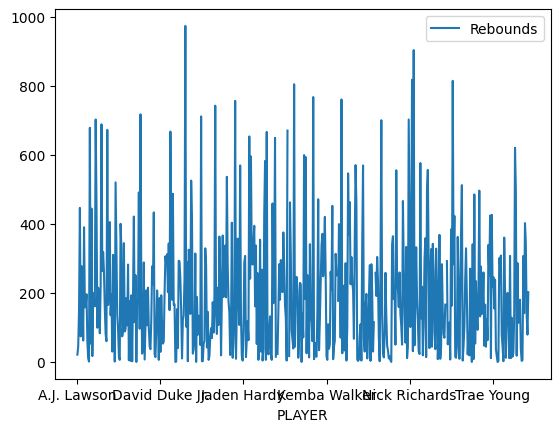

In [5]:
import seaborn as sns

#centers = stats[stats['Pos'] == 'C']
height = personal_data["HEIGHT"]
total_rebounds = totals["TOTAL_REBOUNDS"]
height_to_rebounds = pd.DataFrame({'Height': height, 'Rebounds': total_rebounds})
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 5)

height_to_rebounds.plot()
plt.show()


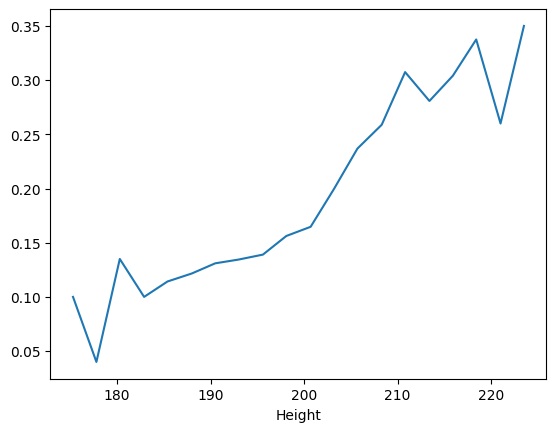

In [20]:
height = personal_data["HEIGHT"]
rebounds = per_minute["TOTAL_REBOUNDS"]
height_to_rebounds = pd.DataFrame({'Height': height, 'Rebounds': rebounds})
result = height_to_rebounds.groupby('Height')['Rebounds'].mean()
#display(height_to_points)

result.plot()
plt.show()


In [23]:
height = personal_data["HEIGHT"]
rebounds = totals["FREE_THROWS_ATTEMPTS"]
height_to_rebounds = pd.DataFrame({'Height': height, 'Rebounds': rebounds})
result = height_to_rebounds.groupby('Height')['Rebounds'].mean()
display(result)

result.plot()
plt.show()


Height
175.3      0.0
177.8      2.0
         ...  
221.0    416.0
223.5     27.0
Name: Rebounds, Length: 20, dtype: float64

,Height,Average free throw attempts
0,175.3,0.00
1,177.8,0.04
...,...,...
18,221.0,0.20
19,223.5,0.16


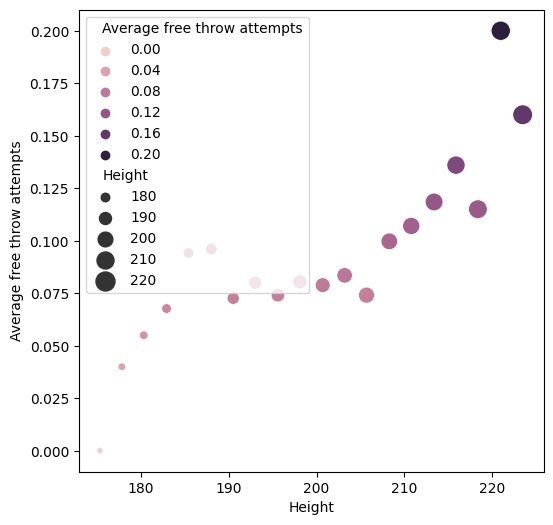

In [34]:
height = personal_data["HEIGHT"]
fta = per_minute["FREE_THROWS_ATTEMPTS"]
height_to_free_throws = pd.DataFrame({'Height': height, 'Free throw attempts': fta})
result = height_to_free_throws.groupby('Height')['Free throw attempts'].mean().reset_index()
result.columns = ['Height', 'Average free throw attempts']
display(result)

import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(
    x='Height',
    y='Average free throw attempts',
    data=result,
    hue='Average free throw attempts',
    size='Height',
    sizes=(20, 200),
)
plt.show()


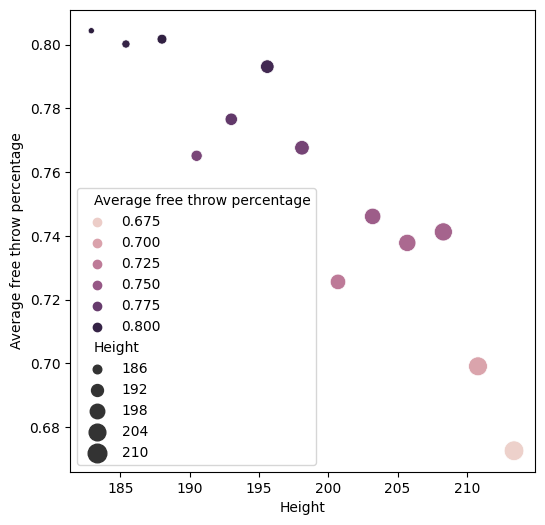

In [40]:
height = personal_data["HEIGHT"]
fta = totals["FREE_THROWS%"]
height_to_free_throws = pd.DataFrame({'Height': height, 'Free throw percentage': fta})
"""result = height_to_free_throws.groupby('Height')['Free throw percentage'].mean().reset_index()
result.columns = ['Height', 'Average free throw percentage']
"""

MINIMUM_PLAYERS_GIVEN_HEIGHT = 10
players_heights = height_to_free_throws.groupby('Height').size()
filtered_heights = players_heights[players_heights >= MINIMUM_PLAYERS_GIVEN_HEIGHT]
filtered_results = height_to_free_throws[height_to_free_throws['Height'].isin(filtered_heights.index)]
result = filtered_results.groupby('Height')['Free throw percentage'].mean().reset_index()
result.columns = ['Height', 'Average free throw percentage']

import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(
    x='Height',
    y='Average free throw percentage',
    data=result,
    hue='Average free throw percentage',
    size='Height',
    sizes=(20, 200),
)
plt.show()
